# Exchange-coupled bilayers (SAF)

- in this notebook we compute the dispersion relation of two 20 nm thick permalloy layers separated with a 2 nm non-magnetic spacer
- the ferromagnetic layers are antiferromagnetically coupled via RKKY, the bilinear term of the interlayer exchange coupling

In [1]:
import tetrax as tx
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
sample = tx.create_sample(geometry="layer", name="Bilayer_iec")
sample.Msat = 800e3
sample.Aex = 13e-12
sample.J1 = -3e-4
mesh = tx.geometries.bilayer_line_trace(20,20,2,1)
sample.set_geom(mesh)

This sample does not have a mesh yet. You cannot set spatially dependent saturation for it.
This sample does not have a mesh yet. You cannot set spatially dependent exchange stiffness for it.
Setting geometry and calculating discretized differential operators on mesh.
Done.


### Setting initial state antiparallel

In [3]:
sample.mag = np.piecewise(sample.xyz, [sample.xyz.y < 0, sample.xyz.y >= 0], [[-1,0,0], [1,0,0]])
sample.show(scale = 5)

/Users/attilak/anaconda3/lib/python3.10/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

![AFM state](afm_bilayers.png)

- We need to use a small field, since for k=0 the frequncy is zero for one of the branches and the eigensolver might fail to converge

In [4]:
exp = tx.create_experimental_setup(sample,name="thickness_20nm")
Bext = 1e-5
exp.Bext = [Bext,0,0]
dispersion = exp.eigenmodes(kmin=-40e6,kmax=40e6,Nk=201, num_modes=5,num_cpus=-1)

100%|███████████████████████████| 201/201 [00:38<00:00,  5.28it/s]


### Dispersion of the acustical and optical branches

<IPython.core.display.Javascript object>


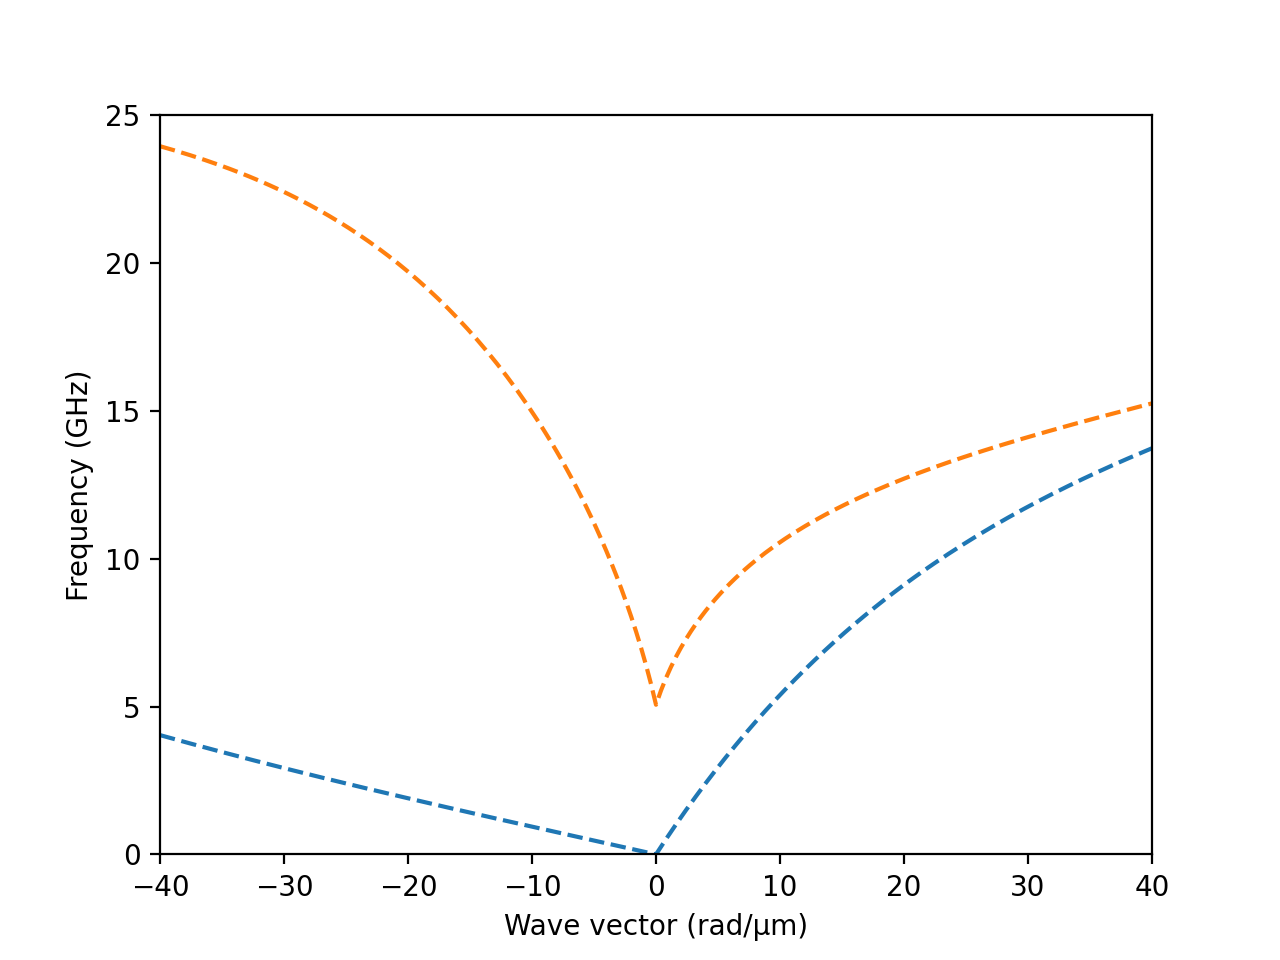

In [5]:
k_ = dispersion["k (rad/m)"]
plt.figure()
for i in range(2):
    plt.plot(k_*1e-6, dispersion[f"f{i} (GHz)"].values, ls="--", marker="", markersize=5, alpha=1)

plt.xlabel("Wave vector (rad/µm)")
plt.ylabel("Frequency (GHz)")
plt.xlim([-40,40])
plt.ylim([0,25])
plt.show()